# Import necessary libraries

In [32]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [33]:
file_path = '../data/transaction_detail.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset


In [34]:
print(df.head())


   Transaction_ID  Transaction_Amount Transaction_Date Transaction_Time  \
0               1             1250.00       2023-05-10         18:30:00   
1               2              500.00       2023-05-10         12:45:00   
2               3            75340.00       2023-05-11         14:20:00   
3               4              200.75       2023-05-12         09:15:00   
4               5              305.90       2023-05-13         11:30:00   

   User_Account_ID Account_Creation_Date Payment_Method Billing_Location  \
0              101            2022-09-15    Credit Card           Mumbai   
1              102            2022-10-01     Debit Card            Delhi   
2              103            2022-07-05            UPI          Chennai   
3              104            2022-11-20    Credit Card        Bangalore   
4              105            2022-08-10     Debit Card          Kolkata   

  Shipping_Location Device_IP_Address Session_Duration  \
0            Mumbai      192.168.1

# Summary statistics of numerical columns


In [35]:
print(df.describe())


       Transaction_ID  Transaction_Amount  User_Account_ID  \
count       64.000000           64.000000        64.000000   
mean        39.250000        22882.565625       139.250000   
std         20.586635        39853.474630        20.586635   
min          1.000000          100.250000       101.000000   
25%         24.750000         1352.837500       124.750000   
50%         40.500000         4196.950000       140.500000   
75%         56.250000        13430.400000       156.250000   
max         72.000000       183430.300000       172.000000   

       Frequency_of_Transactions  Unusual_Time_of_Transaction  \
count                  64.000000                    64.000000   
mean                    7.484375                     0.796875   
std                     1.718177                     3.867568   
min                     2.000000                     0.000000   
25%                     6.000000                     0.000000   
50%                     8.000000                   

# Check for missing values


In [36]:
print(df.isnull().sum())


Transaction_ID                 0
Transaction_Amount             0
Transaction_Date               0
Transaction_Time               0
User_Account_ID                0
Account_Creation_Date          0
Payment_Method                 0
Billing_Location               0
Shipping_Location              0
Device_IP_Address              0
Session_Duration               0
Frequency_of_Transactions      0
Time_Between_Transactions      0
Unusual_Time_of_Transaction    0
Unusual_Transaction_Amounts    0
IP_Address_History             0
Fraud_Label                    0
dtype: int64


# Data types of columns


In [37]:
print(df.dtypes)


Transaction_ID                   int64
Transaction_Amount             float64
Transaction_Date                object
Transaction_Time                object
User_Account_ID                  int64
Account_Creation_Date           object
Payment_Method                  object
Billing_Location                object
Shipping_Location               object
Device_IP_Address               object
Session_Duration                object
Frequency_of_Transactions        int64
Time_Between_Transactions       object
Unusual_Time_of_Transaction      int64
Unusual_Transaction_Amounts      int64
IP_Address_History              object
Fraud_Label                      int64
dtype: object


# Distribution of the target variable 'Fraud_Label'


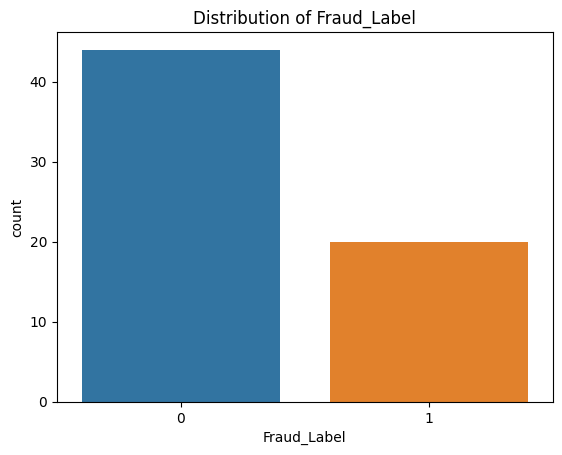

In [38]:
sns.countplot(x='Fraud_Label', data=df)
plt.title('Distribution of Fraud_Label')
plt.show()

# Distribution of Transaction_Amount


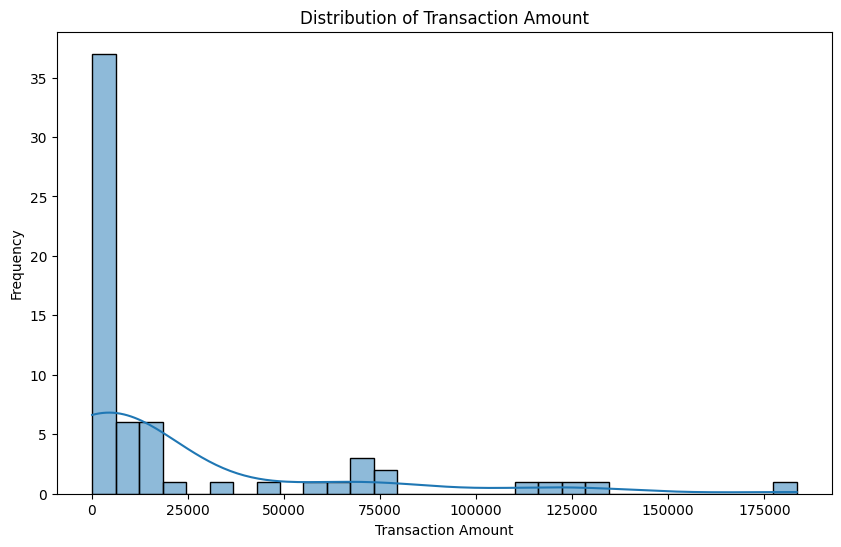

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Relationship between Transaction_Amount and Fraud_Label


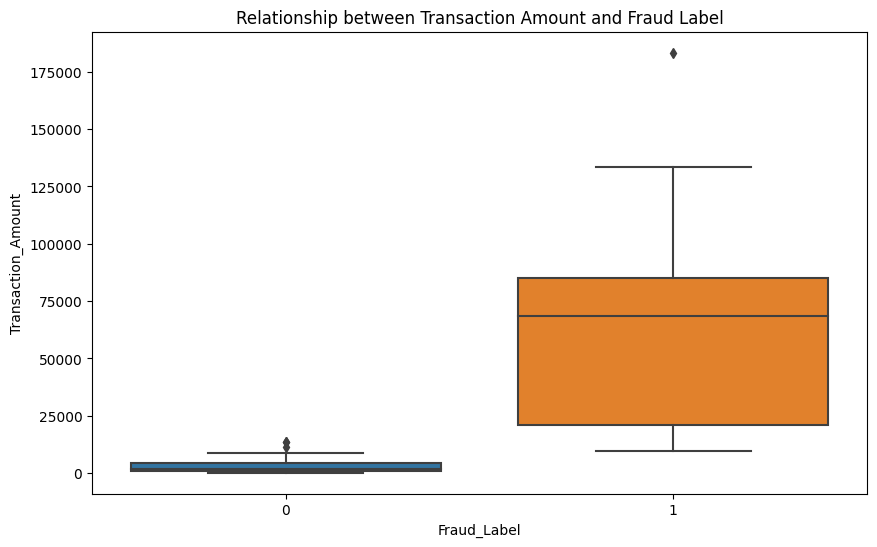

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_Label', y='Transaction_Amount', data=df)
plt.title('Relationship between Transaction Amount and Fraud Label')
plt.show()

# Correlation heatmap for numerical columns


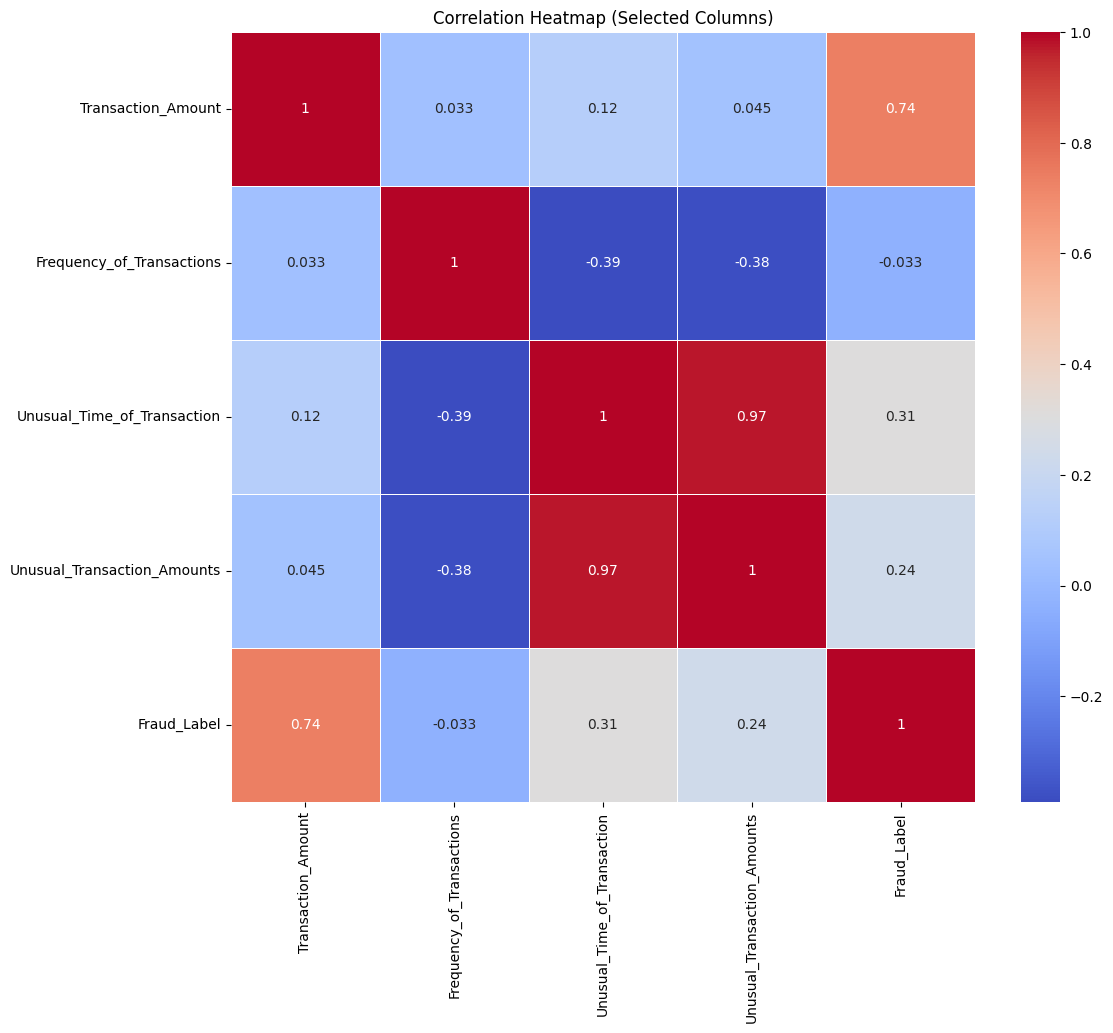

In [41]:
# Extract relevant columns
selected_columns = ['Transaction_Amount', 'Frequency_of_Transactions', 
                     'Unusual_Time_of_Transaction', 'Unusual_Transaction_Amounts', 'Fraud_Label']
selected_df = df[selected_columns]

# Plot Correlation Heatmap for selected columns
plt.figure(figsize=(12, 10))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Selected Columns)')
plt.show()


# Data Preprocessing for training data

In [42]:
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'])
df = df.drop(['Transaction_ID', 'Transaction_Date', 'Transaction_Time'], axis=1)

df['Transaction_Year'] = df['Transaction_DateTime'].dt.year
df['Transaction_Month'] = df['Transaction_DateTime'].dt.month
df['Transaction_Day'] = df['Transaction_DateTime'].dt.day
df['Transaction_Hour'] = df['Transaction_DateTime'].dt.hour
df['Transaction_Minute'] = df['Transaction_DateTime'].dt.minute

df = df.drop(['Transaction_DateTime'], axis=1)
df = pd.get_dummies(df)


# Split the data into features (X) and target variable (y)

In [43]:
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the XGBoost model

In [45]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Save the model to a pickle file

In [46]:
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Make predictions on the test set for evaluation

In [47]:
y_pred = model.predict(X_test)


# Evaluate the model

In [48]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



# Display accuracy


In [49]:
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


# Plot Confusion Matrix


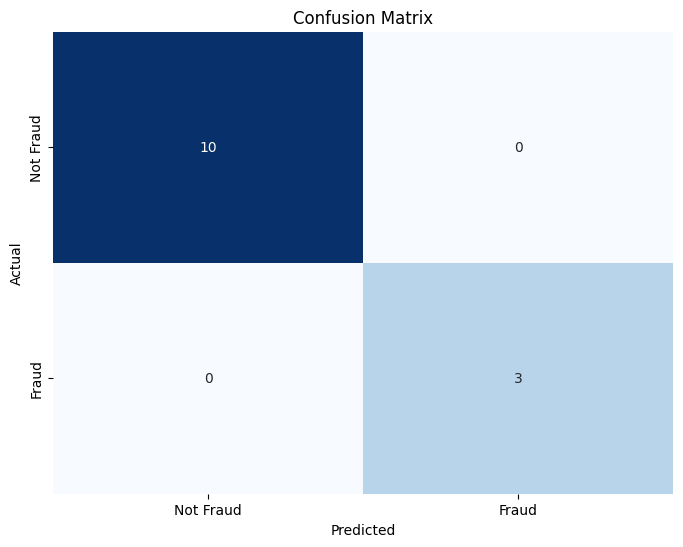

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display Classification Report


In [51]:
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



# Load the model from the pickle file

In [52]:
with open('xgboost_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# input data (sample data)


In [73]:
new_input_data = {
    'Transaction_Amount': [0],
    'User_Account_ID': [104],
    'Account_Creation_Date': ['2022-11-15'],
    'Payment_Method': ['Credit Card'],
    'Billing_Location': ['Bangalore'],
    'Shipping_Location': ['Hyderabad'],
    'Device_IP_Address': ['192.168.1.40'],
    'Session_Duration': ['500 seconds'],
    'Frequency_of_Transactions': [7],
    'Time_Between_Transactions': ['80 seconds'],
    'Unusual_Time_of_Transaction': [0],
    'Unusual_Transaction_Amounts': [0],
    'IP_Address_History': ['192.16.1.40']
}

# Create a DataFrame for new input


In [74]:
new_input = pd.DataFrame(new_input_data)


# Preprocess the new input data to match the training data columns


In [75]:
new_input['Account_Creation_Date'] = pd.to_datetime(new_input['Account_Creation_Date'])
new_input['Session_Duration'] = new_input['Session_Duration'].str.extract('(\d+)').astype(int)
new_input['Time_Between_Transactions'] = new_input['Time_Between_Transactions'].str.extract('(\d+)').astype(int)


# Convert categorical variables into numerical representations


In [76]:
new_input = pd.get_dummies(new_input)


# Make sure the columns in new_input match the columns in X_train


In [77]:
missing_cols = set(X_train.columns) - set(new_input.columns)
for col in missing_cols:
    new_input[col] = 0


C:\Users\Yash\AppData\Local\Temp\ipykernel_9112\3777116252.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input[col] = 0
C:\Users\Yash\AppData\Local\Temp\ipykernel_9112\3777116252.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input[col] = 0
C:\Users\Yash\AppData\Local\Temp\ipykernel_9112\3777116252.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

# Make sure the columns in X_train match the columns in new_input


In [78]:
missing_cols = set(new_input.columns) - set(X_train.columns)
new_input = new_input[X_train.columns]

# Make predictions on the new input using the loaded model

In [79]:
X_train.shape

(51, 219)

In [80]:
fraud_prediction = loaded_model.predict(new_input)

print(f"Fraud Prediction: {fraud_prediction}")

Fraud Prediction: [0]


In [81]:
def predict_fraud(loaded_model, new_input_data):
    # Preprocess the new input data
    new_input = new_input_data

    # Make predictions using the loaded model
    fraud_prediction = model.predict(new_input)
    print(f"Fraud Prediction: {fraud_prediction}") 

In [82]:
print(predict_fraud(loaded_model,new_input))

Fraud Prediction: [0]
None
